In [1]:
from behavior_python.detection.wheelDetectionSession import WheelDetectionSession
from behavior_python.plotters.basePlotters import *
from behavior_python.plotters.detection.wheelDetectionSessionPlotter import *
from behavior_python.plotters.detection.wheelDetectionTrialPlotter import DetectionTrialPlotter

import glob

from behavior_python.wheelUtils import *

In [ ]:
animalid = 'KC144'
area = '*'
glob.glob(f'J:\\presentation\\*_{animalid}_detect_opto*_{area}*')

In [2]:
exp_name = '230831_KC145_detect_opto120_AL__no_cam_KC' 
w = WheelDetectionSession(exp_name,load_flag=True)
# setting outcome
w.data.set_outcome('state') # can also be 'wheel' for wheel reaction outcome classification
w.stats

[23-10-27 16:28:27] - Found session rawdata at J:\presentation
[23-10-27 16:28:27] -  : Started analysis of 230831_KC145_detect_opto120_AL__no_cam_KC
[23-10-27 16:28:27] -  : Found saved data: J:\analysis\230831_KC145_detect_opto120_AL__no_cam_KC\sessionData.parquet
[23-10-27 16:28:27] -  : Loading from J:\analysis\230831_KC145_detect_opto120_AL__no_cam_KC
[23-10-27 16:28:28] - Loaded all data : 0.453s
[23-10-27 16:28:28] - Setting outcome to state
[23-10-27 16:28:28] -  : Done! t=0.46 s
[23-10-27 16:28:28] - Setting outcome to state


all_count = 913
early_count = 442
stim_count = 471
correct_count = 354
miss_count = 117
all_correct_percent = 38.773
hit_rate = 75.159
easy_hit_rate = 97.727
false_alarm = 55.528
nogo_percent = 24.841
median_response_time = 282.0
d_prime = 0.5404889052679603

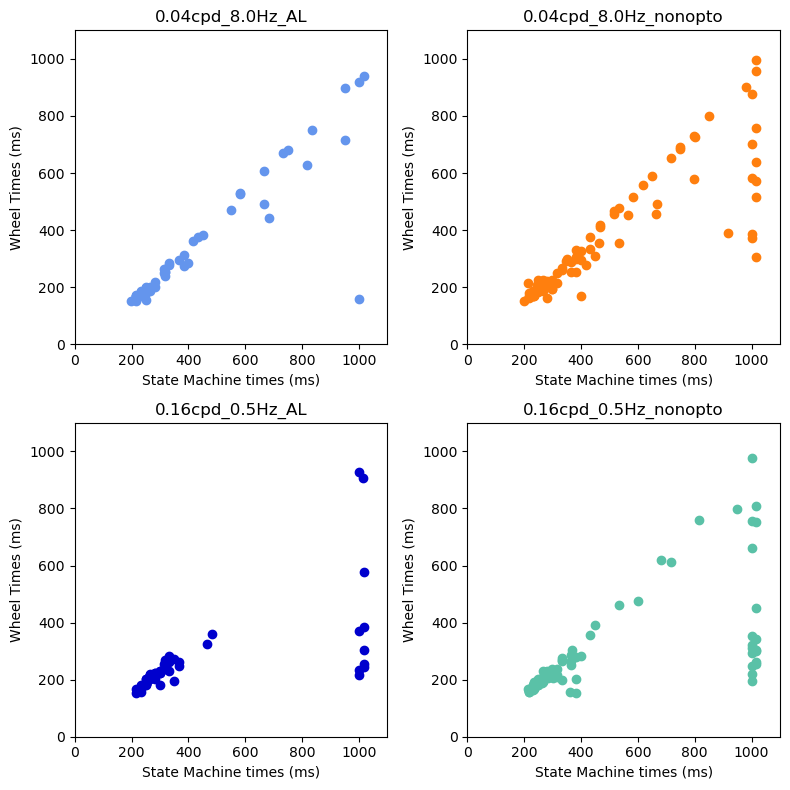

In [3]:
# WHEEL X STATE
uniq_stim = w.data.data['stim_label'].unique().drop_nulls().sort().to_numpy()


f = plt.figure(figsize=(8,8))
for i,s in enumerate(uniq_stim):
    ax = f.add_subplot(2,2,i+1)
    correct_answer = w.data.data.filter((pl.col('stim_label')==s) & 
                                        (pl.col('wheel_outcome')==1))
    sk = correct_answer[0,'stimkey']

    resp_times = correct_answer['response_latency'].to_numpy()
    wheel_times = correct_answer['wheel_reaction_time'].to_numpy()
    c = Color()
    ax.scatter(resp_times,wheel_times,color=c.stim_keys[sk]['color'])
    
    ax.set_ylim([0,1100])
    ax.set_xlim([0,1100])
    ax.set_xlabel('State Machine times (ms)')
    ax.set_ylabel('Wheel Times (ms)')
    ax.set_title(s)

plt.tight_layout()

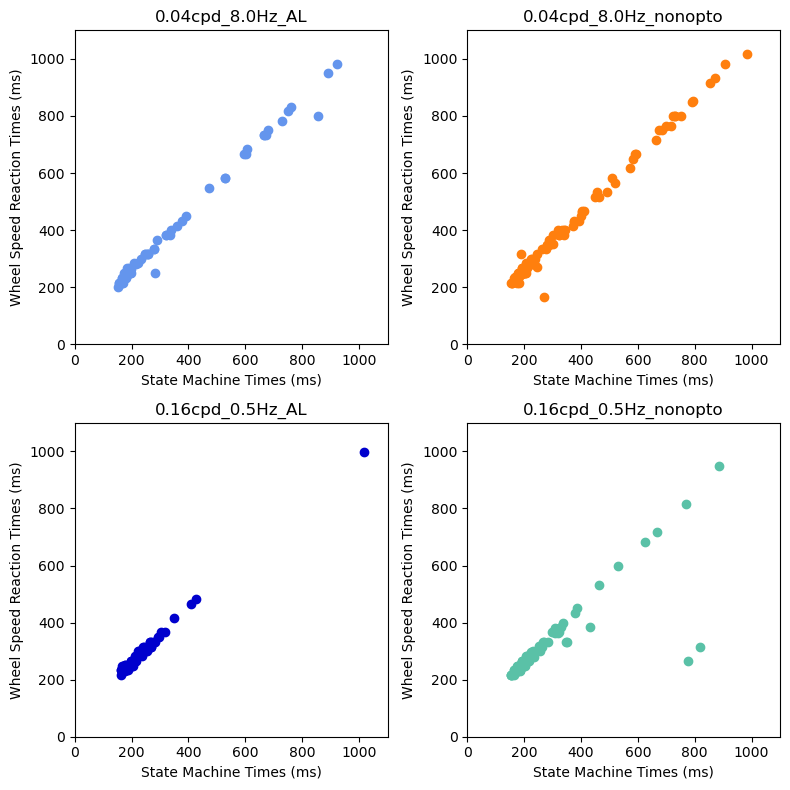

In [4]:
# WHEEL SPEED x STATE
uniq_stim = w.data.data['stim_label'].unique().drop_nulls().sort().to_numpy()


f = plt.figure(figsize=(8,8))
for i,s in enumerate(uniq_stim):
    ax = f.add_subplot(2,2,i+1)
    correct_answer = w.data.data.filter((pl.col('stim_label')==s) & 
                                        (pl.col('wheel_speed_outcome')==1))
    sk = correct_answer[0,'stimkey']

    resp_times = correct_answer['wheel_speed_reaction_time'].to_numpy()
    wheel_times = correct_answer['response_latency'].to_numpy()
    c = Color()
    ax.scatter(resp_times,wheel_times,color=c.stim_keys[sk]['color'])
    
    ax.set_ylim([0,1100])
    ax.set_xlim([0,1100])
    ax.set_ylabel('Wheel Speed Reaction Times (ms)')
    ax.set_xlabel('State Machine Times (ms)')
    ax.set_title(s)

plt.tight_layout()

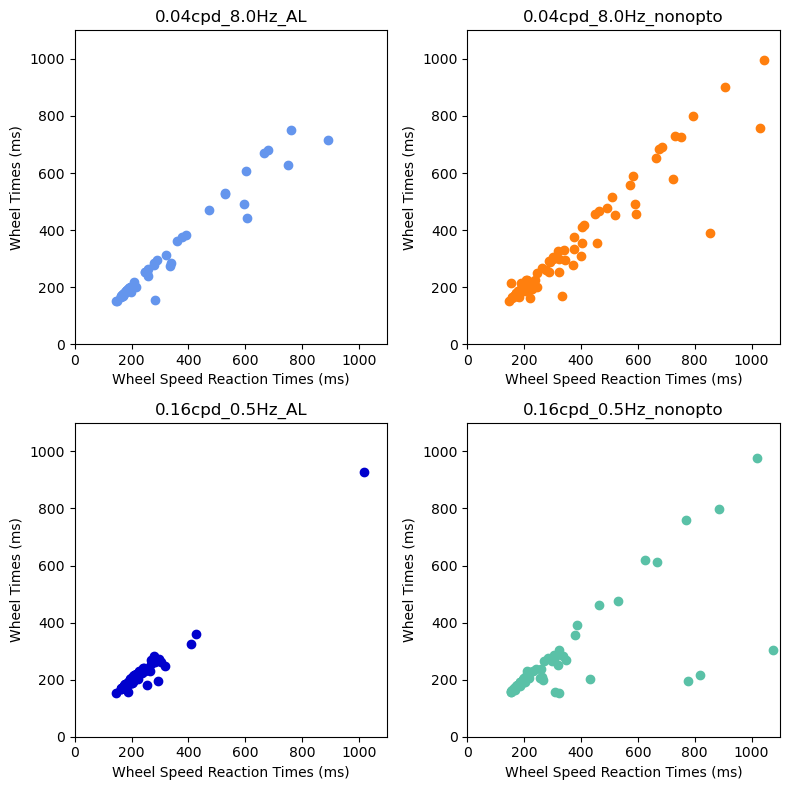

In [5]:
# WHEEL POS X WHEEL SPEED
uniq_stim = w.data.data['stim_label'].unique().drop_nulls().sort().to_numpy()


f = plt.figure(figsize=(8,8))
for i,s in enumerate(uniq_stim):
    ax = f.add_subplot(2,2,i+1)
    correct_answer = w.data.data.filter((pl.col('stim_label')==s) & 
                                        (pl.col('wheel_outcome')==1))
    sk = correct_answer[0,'stimkey']

    resp_times = correct_answer['wheel_speed_reaction_time'].to_numpy()
    wheel_times = correct_answer['wheel_reaction_time'].to_numpy()
    c = Color()
    ax.scatter(resp_times,wheel_times,color=c.stim_keys[sk]['color'])
    
    ax.set_ylim([0,1100])
    ax.set_xlim([0,1100])
    ax.set_xlabel('Wheel Speed Reaction Times (ms)')
    ax.set_ylabel('Wheel Times (ms)')
    ax.set_title(s)

plt.tight_layout()